In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [59]:

def fex27(N,E0,nequi, nmedidas):
    #E0 = Energia total do gas ideal 
    #um=m; 
    #uv=sqrt(uE/uM)
    #N = numero de particulas
    #particulas discerniveis
    #Estado do sistema (r1,p1,r2,p2,....,rN,pN)

    p=np.zeros((N,3)) # momentos lineares
    v0=np.sqrt(2*E0/N)
    p[:,1]=v0*np.ones(N)
    dv0=v0/10
    binsV=np.arange(0,3*v0,dv0)
    hv=np.zeros(len(binsV)-1)

    ED=0
    E=E0
    npassos=nequi+nmedidas

    EDt=np.zeros(npassos)
    EDmedio=0 
    Emedio=0
    for t in range(1,npassos):
        for nact in range(N):
            # perturbar o momento de uma particula escolhida ao acaso
            
            #escolher a particula
            ip=np.random.randint(N)
            dp=(2*np.random.rand(3)-1)*dv0
            dE=np.dot(p[ip,:],dp)+0.5*np.linalg.norm(dp)**2

            if dE<0:
            # aceitamos a perturbação
                p[ip,:]=p[ip,:]+dp
                E+=dE
                ED-=dE
            elif dE<=ED:
                p[ip,:]+=dp
                E+=dE
                ED-=dE   
                   
            EDt[t]=ED
        if t> nequi :
            EDmedio+=ED
            Emedio+=E
            #histograma do modulo das velocidades
            norma_p=np.sqrt(p[:,0]**2+p[:,1]**2+p[:,2]**2)
            aux2,bins=np.histogram(norma_p,bins=binsV)
            hv+=aux2
      

    Emedio=Emedio/nmedidas
    EDmedio=EDmedio/nmedidas
    hv=hv/(nmedidas*N*(binsV[1]-binsV[0]))

    # alinea b
    plt.figure(1)
    tv=np.arange(0,npassos,1)
    plt.plot(tv,EDt,'.')
    # histograma dos valores observados de ED
    # Bins de energia
    deltaE=1; 
    Ebins=np.arange(0,E0/5,deltaE); 

    hED,bins=np.histogram(EDt)
    hED=hED/np.sum(hED)/deltaE #normalizacao
    plt.figure(2)
    PED=(1/EDmedio)*np.exp(-Ebins/EDmedio) # valor esperado para P(ED)
    plt.semilogy(bins[:-1],hED,'.')
    plt.semilogy(Ebins,PED,'k-')
    
    return (Emedio,EDmedio,binsV,hv)

Calculos para E0= 10.0
Calculos para E0= 57.5
Calculos para E0= 105.0
Calculos para E0= 152.5
Calculos para E0= 200.0


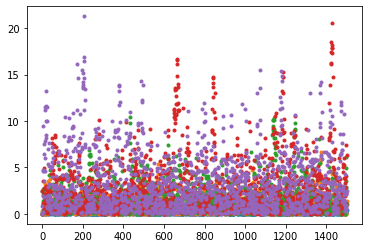

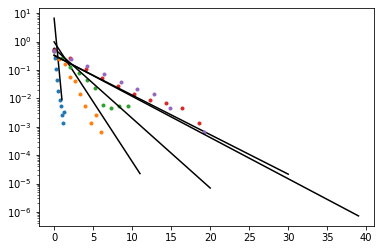

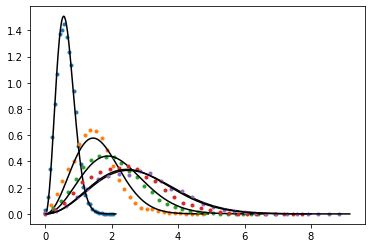

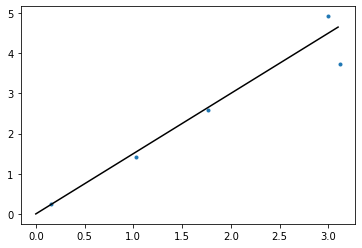

In [60]:
# Exercicio 27 
# semelhante ao exercicio 28
N=40   # número de particulas
nequi=500
nmedidas=1000
ic=0

Es = np.linspace(10,200,5)
k=len(Es)
T=np.zeros(k)
Em=np.zeros(k)
for E0 in Es:
    print('Calculos para E0=',E0)
    Emedio,EDmedio,binsV,hv=fex27(N,E0,nequi, nmedidas)
    v=np.arange(0,max(binsV),0.01)
    T[ic]=EDmedio
    Em[ic]=Emedio
    pvteorico=((4*np.pi*v**2)/ ( 2*np.pi*T[ic] )**(3/2) )*np.exp(-v**2/(2*T[ic]))
    ic+=1

    plt.figure(3)
    plt.plot(binsV[:-1],hv,'.', v,pvteorico,'k-')

plt.figure(4)
Tv=np.arange(0,np.max(T), 0.1)
Emteorica=(3/2)*Tv #alterado para Tv
plt.plot(T,Em/N,'.', Tv, Emteorica,'k-') 

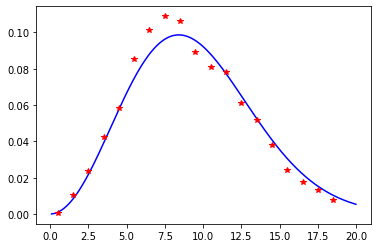

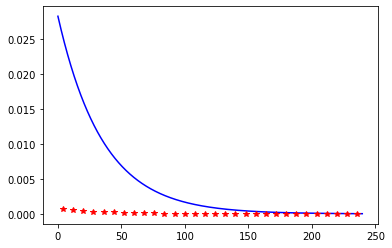

In [61]:
### INACIO

N  = 40
E0 = 50
ED = 0
E = E0 - ED
t_max = 1500
t_stop = 500

v0 = 10
dv0 = v0 / 10

v = np.zeros((N, 3))
v[:, 0] = v0

E_mean = 0
ED_mean = 0
ED_arr = np.zeros(t_max - t_stop)

bins_v = np.arange(0, 2*v0, dv0)
h_v = np.zeros(len(bins_v) - 1)
k = 0

for t in range(t_max):
    for i in range(N):
        dv = np.random.rand(3) * (2 * dv0) - dv0
        idx_p = np.random.randint(0, N)
        
        delta_E = (np.dot(v[idx_p, :], dv) + np.dot(dv, dv) / 2)
        
        if delta_E < 0:
            v[idx_p, :] += dv
            ED += - delta_E
            E += delta_E
        else: 
            if ED >= delta_E:
                v[idx_p, :] += dv
                ED += - delta_E
                E += delta_E
        
    if t >= t_stop:
        E_mean += E
        ED_mean += ED
        v_norm = np.sqrt(v[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2)
        values, bins = np.histogram(v_norm, bins=bins_v)
        values = values / (np.sum(values) * (bins_v[1] - bins_v[0]))
        h_v += values
        ED_arr[k] = ED
        
        k += 1

E_mean = E_mean / k
ED_mean = ED_mean / k
h_v = h_v / k

v = np.arange(0.1, 2*v0, 0.01)
pv = ((4 * np.pi * v**2) / (2 * np.pi * ED_mean)**(3/2)) * np.exp(- v**2 / (2 * ED_mean))

E = np.arange(0, np.max(ED_arr), 0.001)
pE = (1 / ED_mean) * np.exp(- E / ED_mean)

ED_min = np.min(ED_arr)
ED_max = np.max(ED_arr)
n_bins = 30
dED = (ED_max - ED_min) / n_bins
values, bins = np.histogram(ED_arr, bins=np.arange(ED_min+dED/2, ED_max+dED/2, dED))
values = values / (np.sum(ED_arr) * dED)

plt.figure(1)
plt.plot(v, pv, '-b')
plt.plot(bins_v[:-1] + (bins_v[1] - bins_v[0])/2, h_v, '*r')

plt.figure(2)
plt.plot(E, pE, '-b')
plt.plot(bins[:-1], values, '*r')

plt.show()